# Introduction of further File Formats
You'll learn all about the transformation from DICOM to different file formats.

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table of contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [META](#meta)
3. [HDR](#hdr)
4. [MNC](#mnc)

## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [ ]:
!git clone https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp.git

In [ ]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'/content/python-bootcamp/notebooks/DICOM')
os.chdir(sys.path[0])

In [ ]:
%pip install -q ipympl numpy matplotlib SimpleITK imageio nibabel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import SimpleITK as sitk
import nibabel as nib

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).

from Utilities.downloaddata import fetch_data as fdata

## Initial Set-Up (offline)

In [29]:
# Make sure figures appears inline and animations works
# Edit this to "%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import SimpleITK as sitk
import nibabel as nib

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).

from Utilities.downloaddata import fetch_data as fdata

## --- Start notebook ---

The following function `format_and_render_plot()` is just a simplify formatting method for the plots in this notebook.

In [31]:
def format_and_render_plot(axis=False, legend=False):
    '''
    Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids and legends, if not explicitly requested.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.
    '''
    fig = plt.gcf()
    for ax in fig.axes:
        if not axis:
            ax.axis('off')
        if legend:  
            ax.legend(loc='center right')  
    plt.tight_layout()
    plt.show()

## META
To read a META image/header file, you can use the SimpleITK library.

Fetching training_001_mr_T1.mha


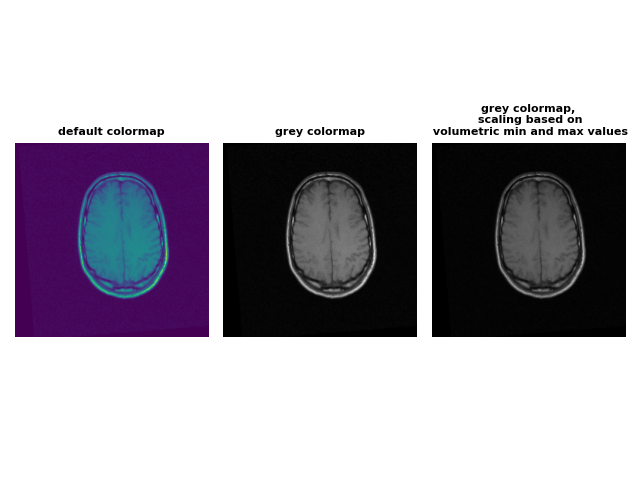

In [32]:
mr_image = sitk.ReadImage(fdata('training_001_mr_T1.mha'))
npa = sitk.GetArrayViewFromImage(mr_image)

# Display the image slice from the middle of the stack, z axis
z = int(mr_image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(mr_image)[z,:,:]

fig, axes = plt.subplots(1, 3)
axes[0].imshow(npa_zslice)
axes[0].set_title('default colormap', fontsize=8, fontweight ="bold")
axes[1].imshow(npa_zslice, cmap='gray')
axes[1].set_title('grey colormap', fontsize=8, fontweight ="bold")
axes[2].imshow(npa_zslice, cmap='gray', vmin=npa.min(), vmax=npa.max())
axes[2].set_title('grey colormap,\n scaling based on\n volumetric min and max values', fontsize=8, fontweight ="bold")
format_and_render_plot()

## HDR
To work with HDR image, you can use python imageio and/or nibabel package.

HDR files can come with both header (.hdr) and image files (.img) or only the image file.

In order to load HDR image file through header, you can use `imread` function from `imageio` module.

In [33]:
img_path = 'Data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.img'
hdr_path = 'Data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.hdr'

img = imageio.imread(hdr_path, 'ITK')    # returns a tuple
print(img)
print(type(img))

# transforms to numpy array
img = np.array(img)                     
print(type(img))
print(np.shape(img))

RuntimeError: `ITK` can not handle the given uri.

Or you can use nibabel:

In [34]:
img = nib.load(img_path)
hdr = nib.load(hdr_path)

In [35]:
print(img)


<class 'nibabel.nifti1.Nifti1Pair'>
data shape (176, 208, 176, 1)
affine:
[[  -1.     0.     0.    87.5]
 [   0.     1.     0.  -103.5]
 [   0.     0.     1.   -87.5]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1PairHeader'> object, endian='<'
sizeof_hdr      : 348
data_type       : b'\x00B\x00\x00YA\x00\x00\xe8@'
db_name         : b'\x00\x00\x14@\x00\x00\x9d?\x00\x00\xbf>\x00\x005>'
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 176 208 176   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.6531e-41 1.0000e+00
 1.0000e+00 1.0000e+00]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_dur

To convert hdr file you can use load function from python nibabel module to load the image and then save funtion to save it as nifti.

Note: both img and hdr files should be in the folder but you can work with .img file

In [36]:
nib.save(img, img_path.replace('.img', '.nii'))

You can also convert .nii to .hdr and .img file will be automatically created!

In [37]:
fname = 'Data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg.nii'
img = nib.load(fname)

print(type(img))
print(img.affine)

nib.nifti1.save(img, fname.replace('.nii','.hdr'))

<class 'nibabel.nifti1.Nifti1Image'>
[[  -1.     0.     0.    87.5]
 [   0.     1.     0.  -103.5]
 [   0.     0.     1.   -87.5]
 [   0.     0.     0.     1. ]]


## MNC

In [38]:
img = nib.load('Data/subject04.mnc')

data = img.get_fdata()
print(data.mean())
print(data.max())
print(data.min())
print(type(data))
print(np.shape(data))

2.4194904212705426
11.0
0.0
<class 'numpy.ndarray'>
(362, 434, 362)


In [40]:
affine = np.array([[0, 0, 1, 0],
                   [0, 1, 0, 0],
                   [1, 0, 0, 0],
                   [0, 0, 0, 1]])

out = nib.Nifti1Image(img.get_fdata(), affine=affine)
nib.save(out, 'Data/subject04.nii.gz')

In [41]:
print(type(img))
print(type(out))

<class 'nibabel.minc1.Minc1Image'>
<class 'nibabel.nifti1.Nifti1Image'>


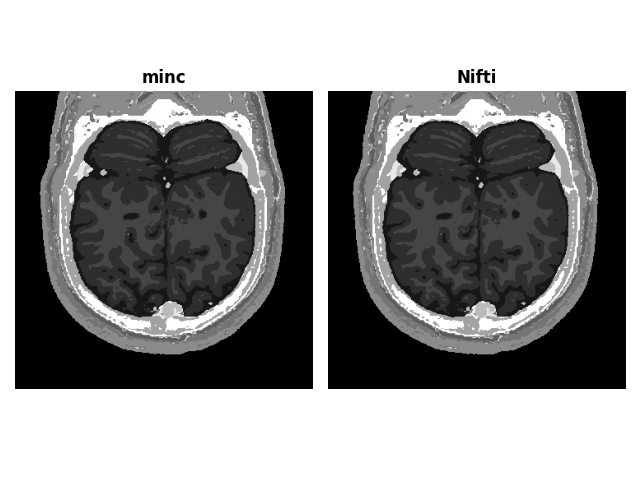

In [42]:
minc_data = img.get_fdata()
out_data = out.get_fdata()

fig, axes = plt.subplots(1, 2)
axes[0].imshow(minc_data[:,100,:], cmap='gray')
axes[0].set_title('minc', fontweight ="bold")
axes[1].imshow(out_data[:,100,:], cmap='gray')
axes[1].set_title('Nifti', fontweight ="bold")
format_and_render_plot()